# Communicate Data Findings (Ford GoBike System Data)

## by Amjad Alkhalaf

## Investigation Overview

In this project, I will work on the 2017 dataset and I will study what are the factors effect trip duration and how? is there any relationship between two or more columns? therefore, I will go thro three steps univariate exploration, bivariate exploration, and multivariate exploration.


The main focus was on the user's gender, the user type, the user ages and the months.

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
Bay Area Bike Share is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city.

In [34]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [35]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('2017-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trips Durations

The average bike duration is between 1 and 200 minutes. Most of bike trips duration around 13 minutes.

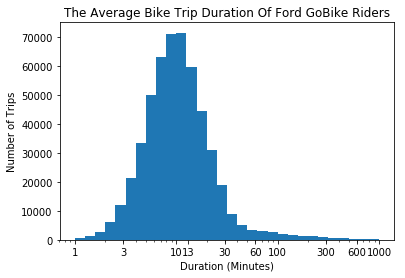

In [36]:
#To simplify the plot, I will convert the seconds to minutes by divide the duration by 60.
df['duration_min'] = df['duration_sec'] / 60
#Using the log transform.
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1,3, 10,13,30,60,  100, 300,600, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('The Average Bike Trip Duration Of Ford GoBike Riders');
plt.ylabel('Number of Trips');

## Distribution of User Type

There are two types of user Subscriber and customer. In this dataset, there is more than 70% of bike riders are subscribers.

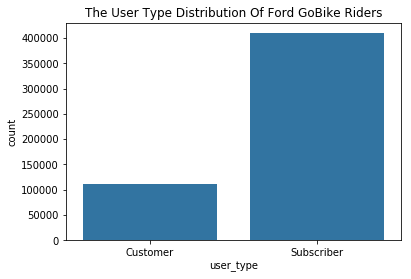

In [37]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color)
plt.title("The User Type Distribution Of Ford GoBike Riders");

## Distribution of User Gender

The most gender type of Ford goBike riders are males by more than 75% of bike riders


In [38]:
#Divide trip by gender and count bike id for each of them
gender_df = df.groupby('member_gender').agg({'bike_id':'count'})

# add proportion column which contains the percentage of bike per gender
gender_df['proportion'] = (gender_df['bike_id']/gender_df['bike_id'].sum())*100

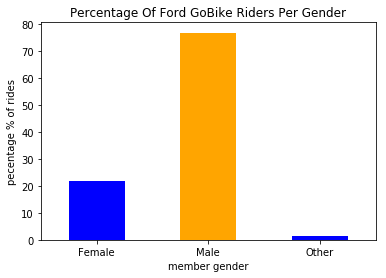

In [39]:
#plot gender type desterpution 
gender_df['proportion'].plot(kind='bar', color= ['blue','orange','blue'])
plt.title('Percentage Of Ford GoBike Riders Per Gender')
plt.ylabel('pecentage % of rides')
plt.xlabel('member gender')
plt.xticks(rotation=360);

## Duration per Months

The period from August to October in 2017 has the most trip duration. However, June has the lowest trip duration. In other words, the summer season has the longest trip duration with an average of 23 minutes. Also, Winter has the lowest trip duration with an average of 15 minutes. Thus, we may conclude that the weather impacts the trip duration.

In [40]:
# I'll create a column month by extracting the months from start_time column (it's contain 6 months only)
df['month'] = pd.DatetimeIndex(df['start_time']).month
#I'll divide the 6 months into 3 seasons Summer, Fall And Winter and get avrege duration for each season.
summer = df.query('month in ["6" , "7" , "8"] ').duration_min.mean()
fall = df.query('month in ["9" , "10" , "11"] ').duration_min.mean()
winter = df.query('month == "12"' ).duration_min.mean()

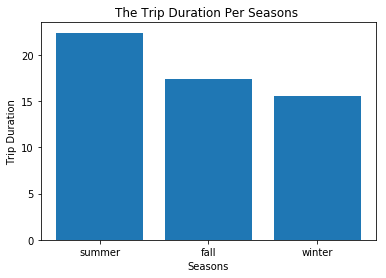

In [41]:
#plot duration per season.
plt.bar(['summer','fall','winter'],[summer , fall , winter] )
plt.title('The Trip Duration Per Seasons ')
plt.xlabel('Seasons')
plt.ylabel('Trip Duration');

## Distribution of User Age groups Per Months

The most age distribution of Ford GoBike riders between 30 to 40, and they tend to rent a bike in October. therefore, October has the highest bike rides.

In [43]:
#To count age from the year of birth
df['member_age'] = 2019-df['member_birth_year']
df['member_generation'] = df['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

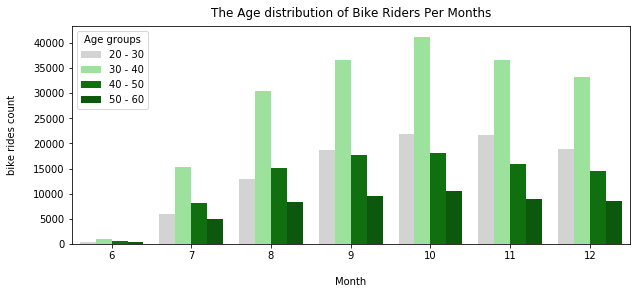

In [44]:
#plot The Age distribution of Bike Riders Per Months
plt.figure(figsize=(10,4))
my_palette = {'20 - 30': 'lightgrey', '30 - 40': 'lightgreen', '40 - 50': 'green','50 - 60': 'darkgreen' }
ax = sb.countplot(x='month', hue='member_generation', palette=my_palette, data=df[df['member_generation'].isin(['20 - 30', '30 - 40', '40 - 50', '50 - 60'])].sort_values(by=['month', 'member_generation']))
plt.title('The Age distribution of Bike Riders Per Months', y=1.015)
plt.xlabel('Month', labelpad=16)
plt.ylabel('bike rides count', labelpad=16)
leg = ax.legend()
leg.set_title('Age groups',prop={'size':10})

### Trip Duration per Months and User Type

The customers tend to rent the bikes for longer trips than the Subscribers over the year, the trip durations mostly spanning over 500 minutes.


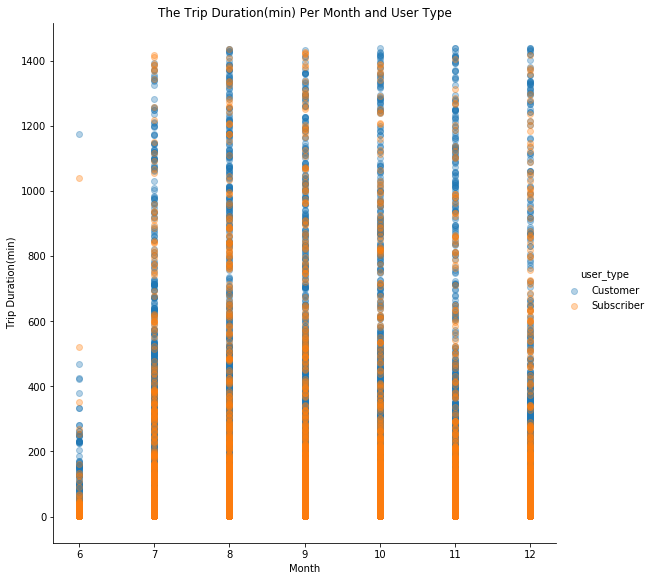

In [45]:
# plot duration per user type and months
g = sb.FacetGrid(data =  df, hue = 'user_type', height = 8)
g.map(plt.scatter, 'month','duration_min', alpha = 1/3)
g.add_legend()
plt.title('The Trip Duration(min) Per Month and User Type')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

### Trip Duration per Months and User Gender 

The Males tend to rent the bikes for longer trips duration than the Females, it's mostly spanning over 700 minutes.

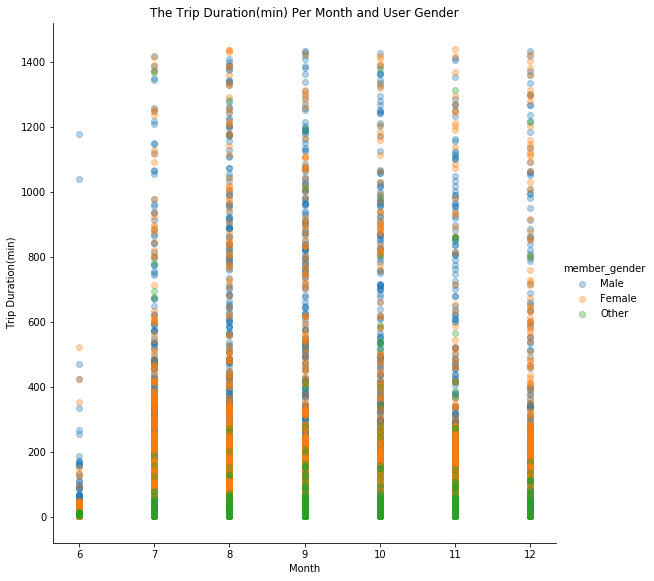

In [46]:
# plot duration per user gender and months
g = sb.FacetGrid(data =  df, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'month','duration_min', alpha = 1/3)
g.add_legend()
plt.title('The Trip Duration(min) Per Month and User Gender')
plt.xlabel('Month')
plt.ylabel('Trip Duration(min)');

## Trips Duration Per User Ages  and User Type 

The customer from 20-40 tends to take long trip duration and from 40-60 tends to rent a bike for short trip duration where subscriber from 40-60 mostly spanning over 400 minutes.


In [47]:
# to get data with age grouped
group_df =df[df['member_generation'].isin(['20 - 30', '30 - 40', '40 - 50', '50 - 60'])].sort_values(by=['month', 'member_generation'])

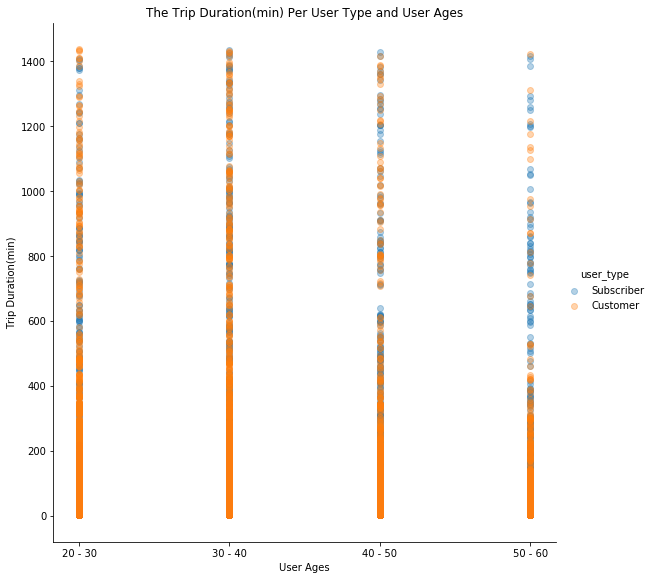

In [48]:
# plot duration per user ages and type
g = sb.FacetGrid(data =  group_df, hue = 'user_type', height = 8)
g.map(plt.scatter, 'member_generation','duration_min', alpha = 1/3)
g.add_legend()
plt.title('The Trip Duration(min) Per User Type and User Ages')
plt.xlabel('User Ages')
plt.ylabel('Trip Duration(min)');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!